In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml

In [3]:
# Task1

  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 



{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# Task 2

print(X.head())
print()
X.info()
print()
print(X.describe())
print()
print(X.shape)






   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

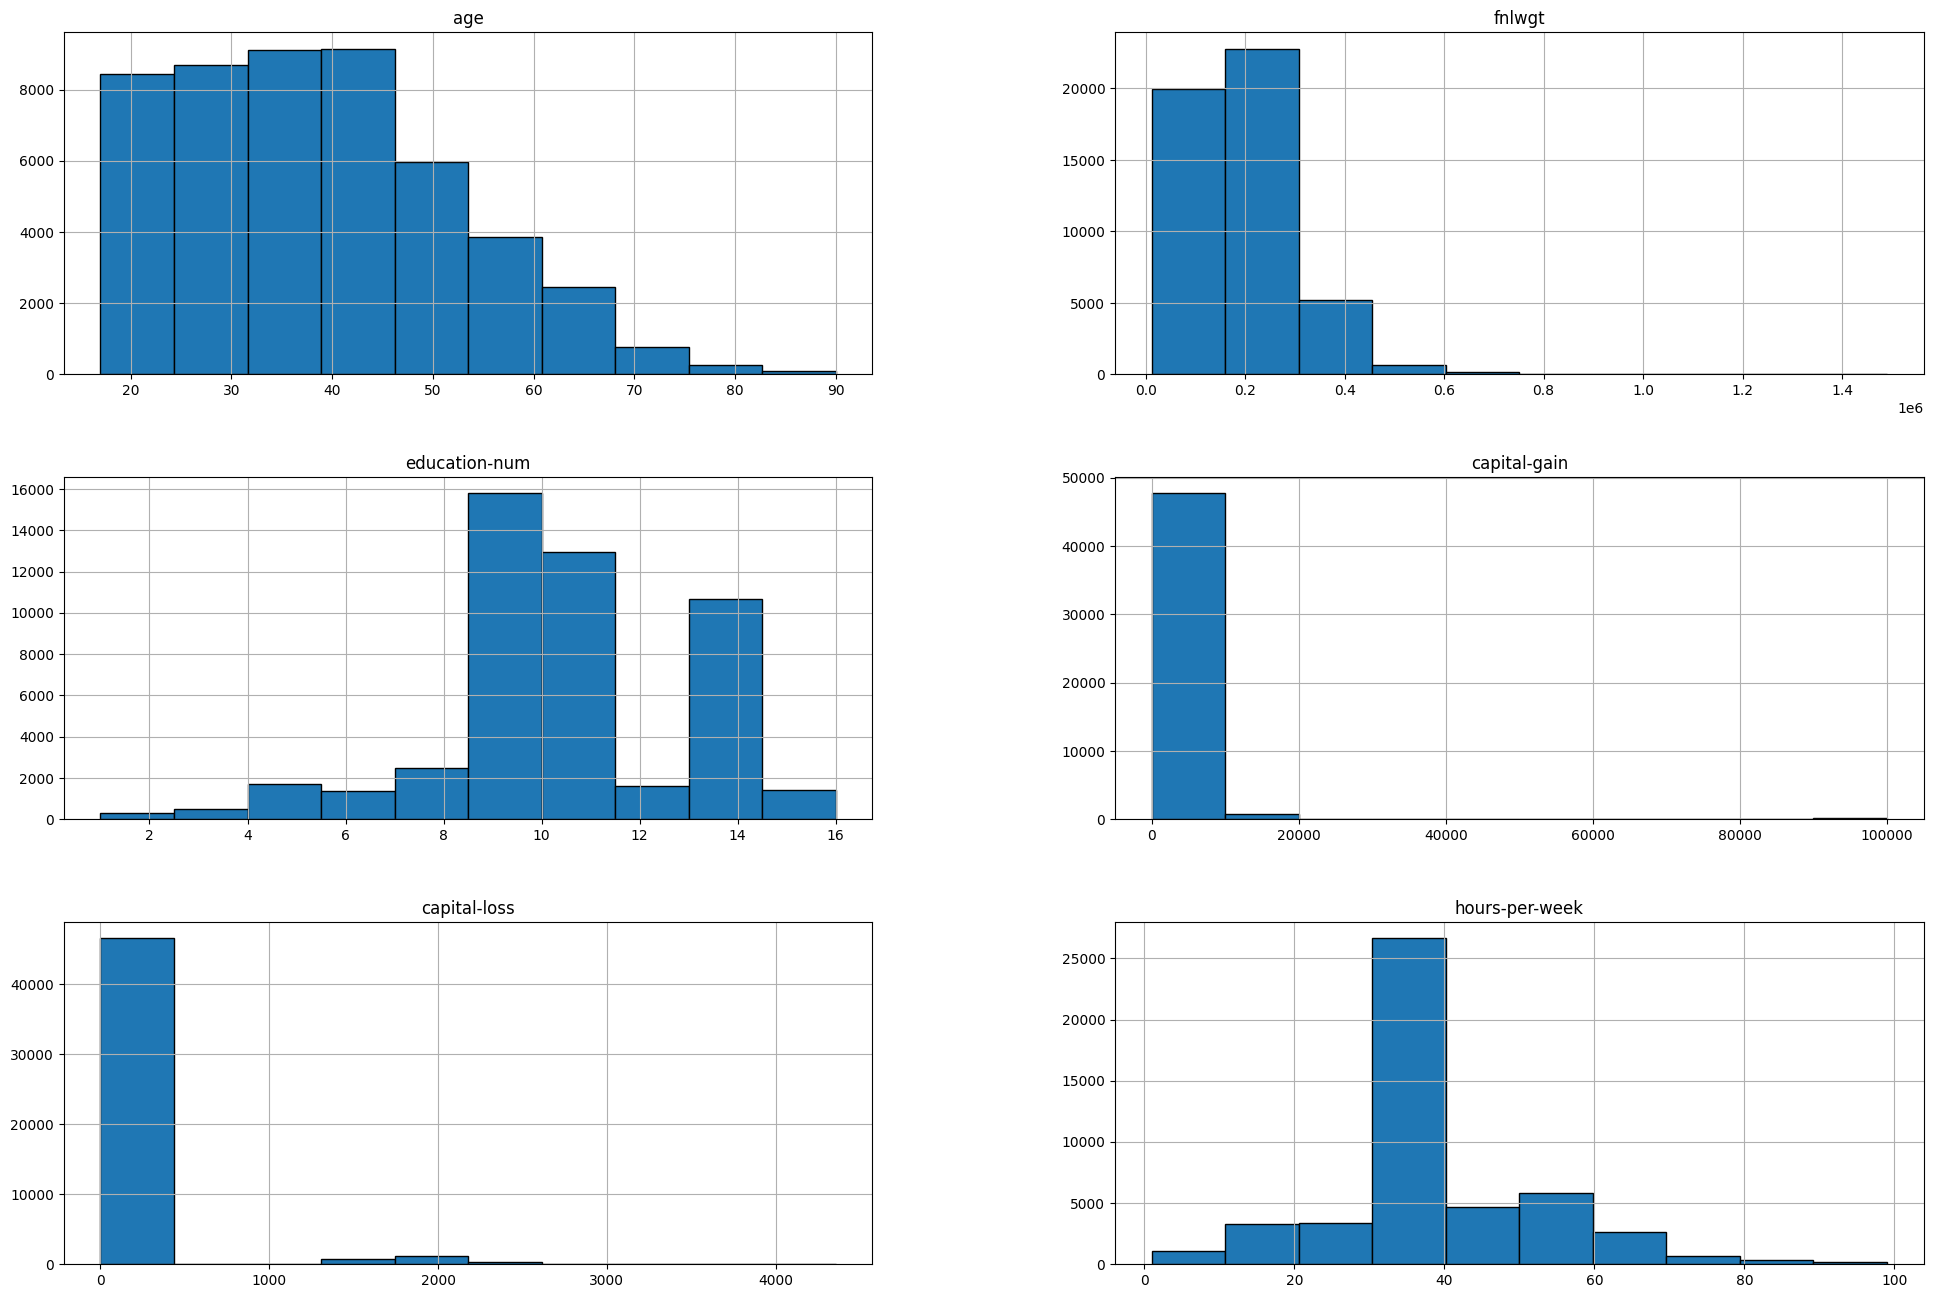

In [5]:

# Task 2.1

# Display a histogram for the features in X
# Set the size of the figure (width, height) in inches
# Set the color of the edges of the bars to black
X.hist(figsize=(24, 16),edgecolor='black')

# Show the histogram
plt.show()

In [6]:
# Task 3

# calculates the number of missing values
print((X == '?').sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64


In [7]:
print("Task 4")  # Replace the missing values you found in the previous step with null (nan)
X = X.replace('?', np.nan)
X.info()

Task 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [8]:
# Task 5 Create and apply a preprocessing pipeline

# Identify numerical columns in the feature set 'X'
numerical_data = X.select_dtypes(include=['int64']).columns.to_list()

# Identify categorical columns in the feature set 'X'
categorical_data = X.select_dtypes(exclude=['number']).columns.to_list()

# Create a numerical processing pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Create a categorical processing pipeline
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessing = ColumnTransformer([('num', num_pipeline, numerical_data),
                                   ('cat', cat_pipeline, categorical_data)],
                                  remainder='passthrough'
                                  )

# Apply the preprocessing to transform the original feature set 'X'
X_prepared = preprocessing.fit_transform(X)

# Get feature names after transformation
f_names = preprocessing.get_feature_names_out()

# Create a DataFrame with the transformed features
X_prepared = pd.DataFrame(data=X_prepared, columns=f_names)

# Print the shape of the prepared feature set
print(X_prepared.shape)


(48842, 105)


In [9]:
# Task 6
y['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [10]:
# Task 7
# Replace the tracing perods with and empty string
y = y.assign(income=y['income'].str.replace('.', ''))
y['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [11]:
# Task 8
# Extract the target variable 'income' from the original 'y' and assign it to 'Y'
Y = y['income']

# Split the preprocessed feature set 'X_prepared' and target variable 'Y' into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, Y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(39073, 105) (39073,) (9769, 105) (9769,)


In [12]:
# Task 9
# Create a Support Vector Machine (SVM) model with a polynomial kernel
model_svm = SVC(kernel='poly', C=0.1, gamma=1)

# Train the SVM model using a subset of the training data (first 10,000 samples)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

In [13]:
#9.1
# Use the trained SVM model to make predictions on the test set
y_predict = model_svm.predict(X_test)

# Display a classification report for the SVM model with C=0.1
print(f'classification_report for C = 0.1')

# Print the classification report, which includes precision, recall, and F1-score
print(classification_report(y_test, y_predict))

classification_report for C = 0.1
              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



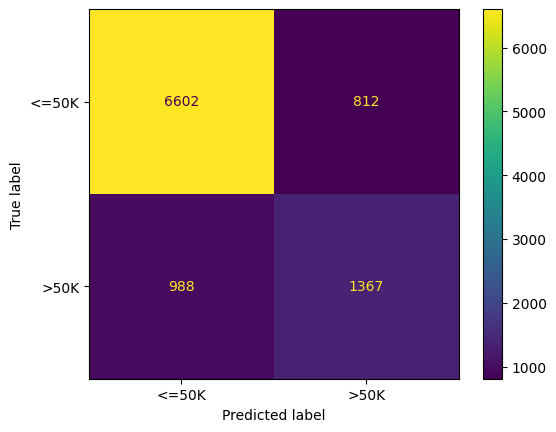

In [14]:
# Task 9.2

#Display Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)



In [15]:
# Task 10
# Split the preprocessed data into training, validation, and test sets
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

# Further split the validation_test set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

# Print the shapes of the training, validation, and test sets
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)



(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


In [16]:
#Task 10.2
# code author luisguiserrano
# Define a dictionary of SVM hyperparameters to be tuned
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1, 10],
                  'gamma': [0.01, 1, 10]
                }

# Create an SVM classifier
svm = SVC()

# Perform a grid search to find the best hyperparameters using cross-validation
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)

# Fit the grid search to the training data (using a subset of the data for efficiency)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

# Get the best estimator from the grid search
svm_winner = svm_gs.best_estimator_

# Evaluate the performance of the best estimator on the validation set
validation_score = svm_winner.score(X_validation, y_validation)
print(f'Validation Accuracy for Best SVM Model: {validation_score:.4f}')

Validation Accuracy for Best SVM Model: 0.8473
